# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_titanic_train = pd.read_csv("titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cleaned_titanic_train = original_titanic_train.copy()

In [4]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从输出结果来看，cleaned_titanic_train共有891条观察值，其中Age、Cabin和Embarked存在缺失值，将在后续进行评估和清理。

数据类型方面，PassengerId表示乘客ID，数据类型不应为数字，应为字符串，所以需要进行数据格式转换。

并且，我们已知Survived（是否幸存）、Pclass（船舱等级）、Sex（性别）、Embarked（登船港口）都是分类数据，可以把数据类型都转换为Category。

In [6]:
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype('str')

In [7]:
cleaned_titanic_train['Survived'] = cleaned_titanic_train['Survived'].astype('category')
cleaned_titanic_train['Pclass'] = cleaned_titanic_train['Pclass'].astype('category')
cleaned_titanic_train['Sex'] = cleaned_titanic_train['Sex'].astype('category')
cleaned_titanic_train['Embarked'] = cleaned_titanic_train['Embarked'].astype('category')

In [8]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


从info方法的输出结果来看，在cleaned_titanic_train中，Age、Cabin和Embarked变量存在缺失值。

In [9]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177条观察值的年龄变量缺失，占总体数据比例20%左右。由于这些观察值数量较多，且的其它变量仍然能为分析提供价值，我们最好保留这些行。

但由于我们后面需要用到的逻辑回归函数`Logit`不允许数据中包含缺失值，所以用乘客年龄平均值对缺失值进行填充。

In [10]:
average_age = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'] = cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isna().sum()

np.int64(0)

In [11]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [12]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

根据数据变量的含义以及内容来看，PassengerId是乘客的唯一标识符，不应该存在重复，因此查看是否存在重复值。

In [13]:
cleaned_titanic_train["PassengerId"].duplicated().sum()

np.int64(0)

处理不一致数据

In [14]:
cleaned_titanic_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
cleaned_titanic_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
cleaned_titanic_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
cleaned_titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

从以上输出结果来看，均不存在不一致数据。

In [18]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


乘客年龄平均为30岁左右，最大值为80岁，最小值为0.42岁。同乘伴侣/同胞数量最大值为8个，最小为0个。同乘父母/孩子数量最大值为6个，最小值为0个。船票价格平均为32元，最大值为512元，最小值为0元，猜测0元表示增票。数据不存在脱离现实的数值。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [19]:
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 探索数据

在着手逻辑回归分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [20]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [21]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

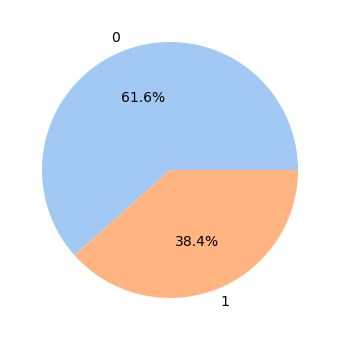

In [22]:
survived_count = cleaned_titanic_train['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

从以上饼图来看，泰坦尼克号遇难乘客多于幸存乘客，比例约为3:2。

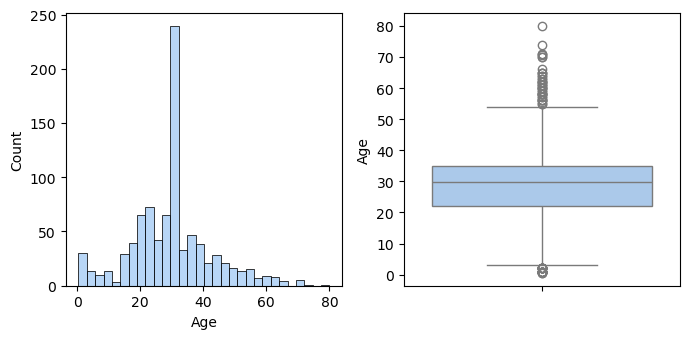

In [23]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_titanic_train, x='Age', ax=axes[0])
sns.boxplot(cleaned_titanic_train, y='Age', ax=axes[1])
plt.show()

大多数乘客年龄位于20岁到40岁之间，但有不少老年乘客以及婴儿。

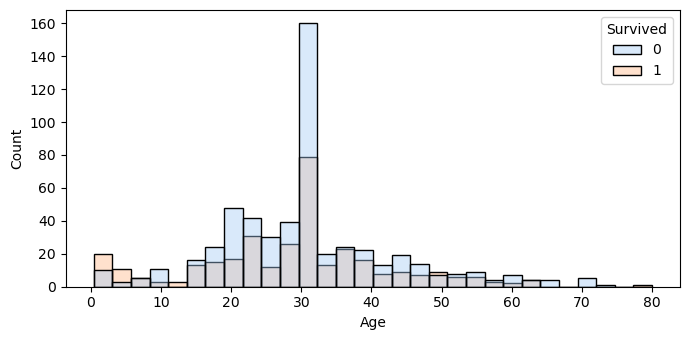

In [25]:
sns.histplot(cleaned_titanic_train, x='Age', hue='Survived', alpha=0.4)
plt.show()

从乘客年龄直方图来看，只有婴儿群体幸存比例较高，绝大部分其余年龄段都是遇难人数多于幸存人数。